In [1]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt
from potes1DCNN import heartnet

Using TensorFlow backend.


In [2]:
##initialize parameters of heartnet
bn_momentum = 0.99
random_seed = 1
eps= 1.1e-5
bias=False
l2_reg=0.
l2_reg_dense=0.
kernel_size=5
maxnorm=10000.
dropout_rate=0.5
dropout_rate_dense=0.
padding='valid'
activation_function='relu'
subsam=2

lr=0.0007
lr_decay=1e-8

load_path='/media/taufiq/Data/heart_sound/models/fold2 2017-12-26 15:20:36.867116/weights.0160-0.8652.hdf5'

fs = 2000


In [19]:
# create heartnet with load path specified

model = heartnet(activation_function,bn_momentum,bias,dropout_rate,dropout_rate_dense,
		eps,kernel_size,l2_reg,l2_reg_dense,load_path,lr,lr_decay,maxnorm,
		padding,random_seed,subsam)
model.summary()
weights = model.get_weights()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 2500, 1)       0                                            
____________________________________________________________________________________________________
input_6 (InputLayer)             (None, 2500, 1)       0                                            
____________________________________________________________________________________________________
input_7 (InputLayer)             (None, 2500, 1)       0                                            
____________________________________________________________________________________________________
input_8 (InputLayer)             (None, 2500, 1)       0                                            
___________________________________________________________________________________________

In [24]:
# Specify input layer
input_ = 3 # 0-3
weights_ = np.hstack(weights[input_])
weights_ = np.reshape(weights_,[5,8])

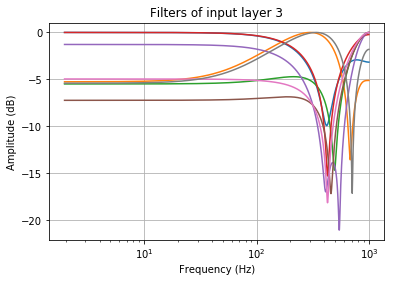

In [25]:
for i in range(0,8):
    w,freq_res=signal.freqz(weights_[:,i])
    plt.plot(w/np.pi*1000,10*np.log10(abs(freq_res)/max(abs(freq_res))))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xscale('log')
plt.title('Filters of input layer ' + np.str(input_))
plt.show()

In [51]:
a = range(1,3)
print np.flip(a,0)

[2 1]
